In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
# Reading Multiple txt Files and Creating Data Frame

path = '/Users/Merve/Desktop/Veri Bilimi/Bootcamp/Project 1/dataset' # get path for all files that used by EDA

all_files = glob.glob(path + "/*.txt")

# create empty list and append all files

file_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    file_list.append(df)

# Concatenate all data into one DataFrame that called "mta"
  
mta = pd.concat(file_list) 

In [3]:
mta.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,03:00:00,REGULAR,6845468,2321627
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,07:00:00,RECOVR AUD,6845479,2321635
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,11:00:00,RECOVR AUD,6845578,2321702
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,15:00:00,RECOVR AUD,6845780,2321753
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,19:00:00,REGULAR,6846083,2321818


In [35]:
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
212294,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,04:00:00,REGULAR,5554,541
212295,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,08:00:00,REGULAR,5554,541
212296,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,12:00:00,REGULAR,5554,541
212297,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,16:00:00,REGULAR,5554,541
212298,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,20:00:00,REGULAR,5554,541


In [3]:
#Text dosyalarını birbirine ekleyince her bir verinin kendi indexini alıyor düzeltmek için:
mta.reset_index(drop=True, inplace=True)

In [309]:
mta.shape

(2672783, 11)

In [38]:
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2672778,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,04:00:00,REGULAR,5554,541
2672779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,08:00:00,REGULAR,5554,541
2672780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,12:00:00,REGULAR,5554,541
2672781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,16:00:00,REGULAR,5554,541
2672782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,20:00:00,REGULAR,5554,541


In [310]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672783 entries, 0 to 212298
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), obj

In [4]:
#strip space in columns name:
mta.columns = mta.columns.str.strip()

In [5]:
mta.columns = mta.columns.str.lower()

In [463]:
mta.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [6]:
#delete unnecessary columns:
mta.drop(["linename", 'division', 'desc'], axis = 1, inplace=True)

In [405]:
mta.head()

,c/a,unit,scp,station,date,time,entries,exits
0,A002,R051,02-00-00,59 ST,11/24/2018,03:00:00,6845468,2321627
1,A002,R051,02-00-00,59 ST,11/24/2018,07:00:00,6845479,2321635
2,A002,R051,02-00-00,59 ST,11/24/2018,11:00:00,6845578,2321702
3,A002,R051,02-00-00,59 ST,11/24/2018,15:00:00,6845780,2321753
4,A002,R051,02-00-00,59 ST,11/24/2018,19:00:00,6846083,2321818


In [7]:
# since dtype of them is object we can combine them by using "+"
mta["datetime"] = mta["date"] + " " + mta["time"]
mta.head()

,c/a,unit,scp,station,date,time,entries,exits,datetime
0,A002,R051,02-00-00,59 ST,11/24/2018,03:00:00,6845468,2321627,11/24/2018 03:00:00
1,A002,R051,02-00-00,59 ST,11/24/2018,07:00:00,6845479,2321635,11/24/2018 07:00:00
2,A002,R051,02-00-00,59 ST,11/24/2018,11:00:00,6845578,2321702,11/24/2018 11:00:00
3,A002,R051,02-00-00,59 ST,11/24/2018,15:00:00,6845780,2321753,11/24/2018 15:00:00
4,A002,R051,02-00-00,59 ST,11/24/2018,19:00:00,6846083,2321818,11/24/2018 19:00:00


In [8]:
mta["datetime"] = pd.to_datetime(mta["datetime"])

In [9]:
mta["date"] = pd.to_datetime(mta["date"])

In [10]:
mta["dayname"] = mta["datetime"].dt.day_name()

In [627]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672783 entries, 0 to 2672782
Data columns (total 10 columns):
c/a         object
unit        object
scp         object
station     object
date        datetime64[ns]
time        object
entries     int64
exits       int64
datetime    datetime64[ns]
dayname     object
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 203.9+ MB


In [255]:
mta["c/a"].value_counts()

PTH22    23320
R610     12669
PTH02    12587
PTH03    12407
PTH05    11853
         ...  
R411      1095
J022      1092
H037      1092
N206      1008
A085       545
Name: c/a, Length: 751, dtype: int64

In [104]:
mta["unit"].value_counts()

R549    37257
R014    27475
R057    26847
R029    25816
R540    25795
        ...  
R455     1614
R262     1593
R280     1535
R349     1092
R435     1092
Name: unit, Length: 469, dtype: int64

In [51]:
mta["scp"].value_counts()

00-00-00    251495
00-00-01    249795
00-00-02    222646
00-00-03    112159
00-03-00     93878
             ...  
03-00-08         3
00-F6-01         1
02-01-08         1
00-10-00         1
04-03-04         1
Name: scp, Length: 230, dtype: int64

In [53]:
mta["station"].value_counts()

34 ST-PENN STA     55240
FULTON ST          52626
GRD CNTRL-42 ST    41627
23 ST              39926
86 ST              33236
                   ...  
ALLERTON AV         1631
BEVERLEY ROAD       1593
190 ST              1535
SUTTER AV           1092
CLEVELAND ST        1092
Name: station, Length: 378, dtype: int64

In [319]:
mta.isnull().any()

c/a         False
unit        False
scp         False
station     False
date        False
time        False
entries     False
exits       False
datetime    False
dtype: bool

In [11]:
# We can combine the columns that identify the turnstiles
mta["turnstile"] = mta["c/a"] + "-" + mta["unit"] + "-" + mta["scp"] + "-" + mta["station"]
mta.head(12)

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile
0,A002,R051,02-00-00,59 ST,2018-11-24,03:00:00,6845468,2321627,2018-11-24 03:00:00,Saturday,A002-R051-02-00-00-59 ST
1,A002,R051,02-00-00,59 ST,2018-11-24,07:00:00,6845479,2321635,2018-11-24 07:00:00,Saturday,A002-R051-02-00-00-59 ST
2,A002,R051,02-00-00,59 ST,2018-11-24,11:00:00,6845578,2321702,2018-11-24 11:00:00,Saturday,A002-R051-02-00-00-59 ST
3,A002,R051,02-00-00,59 ST,2018-11-24,15:00:00,6845780,2321753,2018-11-24 15:00:00,Saturday,A002-R051-02-00-00-59 ST
4,A002,R051,02-00-00,59 ST,2018-11-24,19:00:00,6846083,2321818,2018-11-24 19:00:00,Saturday,A002-R051-02-00-00-59 ST
5,A002,R051,02-00-00,59 ST,2018-11-24,23:00:00,6846261,2321843,2018-11-24 23:00:00,Saturday,A002-R051-02-00-00-59 ST
6,A002,R051,02-00-00,59 ST,2018-11-25,03:00:00,6846296,2321858,2018-11-25 03:00:00,Sunday,A002-R051-02-00-00-59 ST
7,A002,R051,02-00-00,59 ST,2018-11-25,07:00:00,6846304,2321868,2018-11-25 07:00:00,Sunday,A002-R051-02-00-00-59 ST
8,A002,R051,02-00-00,59 ST,2018-11-25,11:00:00,6846361,2321919,2018-11-25 11:00:00,Sunday,A002-R051-02-00-00-59 ST
9,A002,R051,02-00-00,59 ST,2018-11-25,15:00:00,6846560,2321983,2018-11-25 15:00:00,Sunday,A002-R051-02-00-00-59 ST


**Calculation of counts of people who entry on each turnstile for determine daily entries**

In [12]:
mta.sort_values(by=["turnstile","datetime"], inplace=True)

In [17]:
mta.tail()

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts
2672778,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-25,04:00:00,5554,541,2020-12-25 04:00:00,Friday,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0
2672779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-25,08:00:00,5554,541,2020-12-25 08:00:00,Friday,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0
2672780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-25,12:00:00,5554,541,2020-12-25 12:00:00,Friday,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0
2672781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-25,16:00:00,5554,541,2020-12-25 16:00:00,Friday,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0
2672782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-25,20:00:00,5554,541,2020-12-25 20:00:00,Friday,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0


In [18]:
mta.groupby(["turnstile"])[["entries"]].max()

,entries
turnstile,
A002-R051-02-00-00-59 ST,7508502
A002-R051-02-00-01-59 ST,6657152
A002-R051-02-03-00-59 ST,1406768
A002-R051-02-03-01-59 ST,1529850
A002-R051-02-03-02-59 ST,6612649
...,...
TRAM2-R469-00-00-01-RIT-ROOSEVELT,3621906
TRAM2-R469-00-03-00-RIT-ROOSEVELT,753039
TRAM2-R469-00-03-01-RIT-ROOSEVELT,3133524


In [13]:
mta["counts"] = mta.groupby(["turnstile"])["entries"].diff()

In [20]:
mta.head(20)

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts
0,A002,R051,02-00-00,59 ST,2018-11-24,03:00:00,6845468,2321627,2018-11-24 03:00:00,Saturday,A002-R051-02-00-00-59 ST,NaN
1,A002,R051,02-00-00,59 ST,2018-11-24,07:00:00,6845479,2321635,2018-11-24 07:00:00,Saturday,A002-R051-02-00-00-59 ST,11.0
2,A002,R051,02-00-00,59 ST,2018-11-24,11:00:00,6845578,2321702,2018-11-24 11:00:00,Saturday,A002-R051-02-00-00-59 ST,99.0
3,A002,R051,02-00-00,59 ST,2018-11-24,15:00:00,6845780,2321753,2018-11-24 15:00:00,Saturday,A002-R051-02-00-00-59 ST,202.0
4,A002,R051,02-00-00,59 ST,2018-11-24,19:00:00,6846083,2321818,2018-11-24 19:00:00,Saturday,A002-R051-02-00-00-59 ST,303.0
5,A002,R051,02-00-00,59 ST,2018-11-24,23:00:00,6846261,2321843,2018-11-24 23:00:00,Saturday,A002-R051-02-00-00-59 ST,178.0
6,A002,R051,02-00-00,59 ST,2018-11-25,03:00:00,6846296,2321858,2018-11-25 03:00:00,Sunday,A002-R051-02-00-00-59 ST,35.0
7,A002,R051,02-00-00,59 ST,2018-11-25,07:00:00,6846304,2321868,2018-11-25 07:00:00,Sunday,A002-R051-02-00-00-59 ST,8.0
8,A002,R051,02-00-00,59 ST,2018-11-25,11:00:00,6846361,2321919,2018-11-25 11:00:00,Sunday,A002-R051-02-00-00-59 ST,57.0
9,A002,R051,02-00-00,59 ST,2018-11-25,15:00:00,6846560,2321983,2018-11-25 15:00:00,Sunday,A002-R051-02-00-00-59 ST,199.0


In [22]:
(mta.counts < 0).any()

True

In [23]:
mta[mta.counts < 0]

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts
1415467,A002,R051,02-05-00,59 ST,2019-12-18,11:00:00,12,0,2019-12-18 11:00:00,Wednesday,A002-R051-02-05-00-59 ST,-204.0
199837,A002,R051,02-06-00,59 ST,2018-12-04,19:00:00,474,6,2018-12-04 19:00:00,Tuesday,A002-R051-02-06-00-59 ST,-18064.0
1004448,A002,R051,02-06-00,59 ST,2019-12-05,15:00:00,269,6,2019-12-05 15:00:00,Thursday,A002-R051-02-06-00-59 ST,-130525.0
1830051,A006,R079,00-00-04,5 AV/59 ST,2020-11-28,01:00:00,33862,12239,2020-11-28 01:00:00,Saturday,A006-R079-00-00-04-5 AV/59 ST,-7802937.0
1830093,A006,R079,00-03-00,5 AV/59 ST,2020-11-28,01:00:00,34480,18810,2020-11-28 01:00:00,Saturday,A006-R079-00-03-00-5 AV/59 ST,-9336128.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2671001,R730,R431,00-00-04,EASTCHSTER/DYRE,2020-12-25,00:00:00,1559829583,1728236416,2020-12-25 00:00:00,Friday,R730-R431-00-00-04-EASTCHSTER/DYRE,-3.0
2037647,S101,R070,00-00-06,ST. GEORGE,2020-11-28,03:00:00,12388,4,2020-11-28 03:00:00,Saturday,S101-R070-00-00-06-ST. GEORGE,-2092354.0
198950,TRAM1,R468,00-00-00,RIT-MANHATTAN,2018-11-25,09:00:00,7,3,2018-11-25 09:00:00,Sunday,TRAM1-R468-00-00-00-RIT-MANHATTAN,-199719.0
199027,TRAM1,R468,00-00-02,RIT-MANHATTAN,2018-11-25,16:00:00,159,9,2018-11-25 16:00:00,Sunday,TRAM1-R468-00-00-02-RIT-MANHATTAN,-33969.0


In [ ]:
#bazı satırları kontrol edelim:

In [500]:
mta[mta.index == 1415465]

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,turnstile,counts
1415465,A002,R051,02-05-00,59 ST,NQR456W,BMT,2019-12-17,11:00:00,REGULAR,212,0,2019-12-17 11:00:00,A002-R051-02-05-00-59 ST,1.00


In [498]:
mta[mta.index == 1415466]

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,turnstile,counts
1415466,A002,R051,02-05-00,59 ST,NQR456W,BMT,2019-12-17,15:00:00,REGULAR,216,0,2019-12-17 15:00:00,A002-R051-02-05-00-59 ST,4.00


In [499]:
mta[mta.index == 1415467]

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,turnstile,counts
1415467,A002,R051,02-05-00,59 ST,NQR456W,BMT,2019-12-18,11:00:00,REGULAR,12,0,2019-12-18 11:00:00,A002-R051-02-05-00-59 ST,-204.00


In [14]:
mta["counts"] = np.where((mta.counts < 0), abs(mta["counts"]), mta["counts"])

In [25]:
(mta.counts < 0).any()

False

**Counts of people who exit from each turnstile for determine daily exits**

In [15]:
mta["counts_exits"] = mta.groupby(["turnstile"])[["exits"]].diff()

In [31]:
mta.head(20)

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts,counts_exits
0,A002,R051,02-00-00,59 ST,2018-11-24,03:00:00,6845468,2321627,2018-11-24 03:00:00,Saturday,A002-R051-02-00-00-59 ST,NaN,NaN
1,A002,R051,02-00-00,59 ST,2018-11-24,07:00:00,6845479,2321635,2018-11-24 07:00:00,Saturday,A002-R051-02-00-00-59 ST,11.0,8.0
2,A002,R051,02-00-00,59 ST,2018-11-24,11:00:00,6845578,2321702,2018-11-24 11:00:00,Saturday,A002-R051-02-00-00-59 ST,99.0,67.0
3,A002,R051,02-00-00,59 ST,2018-11-24,15:00:00,6845780,2321753,2018-11-24 15:00:00,Saturday,A002-R051-02-00-00-59 ST,202.0,51.0
4,A002,R051,02-00-00,59 ST,2018-11-24,19:00:00,6846083,2321818,2018-11-24 19:00:00,Saturday,A002-R051-02-00-00-59 ST,303.0,65.0
5,A002,R051,02-00-00,59 ST,2018-11-24,23:00:00,6846261,2321843,2018-11-24 23:00:00,Saturday,A002-R051-02-00-00-59 ST,178.0,25.0
6,A002,R051,02-00-00,59 ST,2018-11-25,03:00:00,6846296,2321858,2018-11-25 03:00:00,Sunday,A002-R051-02-00-00-59 ST,35.0,15.0
7,A002,R051,02-00-00,59 ST,2018-11-25,07:00:00,6846304,2321868,2018-11-25 07:00:00,Sunday,A002-R051-02-00-00-59 ST,8.0,10.0
8,A002,R051,02-00-00,59 ST,2018-11-25,11:00:00,6846361,2321919,2018-11-25 11:00:00,Sunday,A002-R051-02-00-00-59 ST,57.0,51.0
9,A002,R051,02-00-00,59 ST,2018-11-25,15:00:00,6846560,2321983,2018-11-25 15:00:00,Sunday,A002-R051-02-00-00-59 ST,199.0,64.0


In [27]:
(mta.counts_exits < 0).any()

True

In [16]:
mta.counts_exits = abs(mta.counts_exits)

In [29]:
(mta.counts_exits < 0).any()

False

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # for no scientific notation

**Daily total counts of people enter for each turnstile**

In [18]:
mta.groupby(["turnstile","date", "dayname"])[["counts"]].sum().sort_values("counts") # shows daily total entries for each turnstile

counts
turnstile                           date       dayname                
TRAM2-R469-00-05-01-RIT-ROOSEVELT   2020-12-25 Friday             0.00
R262A-R195-04-00-02-161/YANKEE STAD 2020-11-30 Monday             0.00
                                    2020-11-29 Sunday             0.00
                                    2020-11-28 Saturday           0.00
N087-R282-01-05-00-SPRING ST        2018-12-21 Friday             0.00
...                                                                ...
R329-R362-00-00-00-ALLERTON AV      2019-11-30 Saturday  2038502614.00
N534-R220-01-00-02-CARROLL ST       2020-11-28 Saturday  2038664416.00
R329-R362-00-00-00-ALLERTON AV      2019-12-11 Wednesday 2046736200.00
R729-R292-00-00-02-BAYCHESTER AV    2019-11-30 Saturday  2055864060.00
N078-R175-01-03-00-14 ST            2019-11-30 Saturday  2129491029.00

[443003 rows x 1 columns]

In [644]:
(mta.counts_exits == 0).sum()
# 0 larla sonra ilgilen

406272

In [645]:
(mta.counts == 0).sum()
# 0 larla sonra ilgilen

448353

In [19]:
entries_count = mta.groupby(["turnstile","date", "dayname"], as_index=False)[["counts"]].sum().sort_values("counts")
# a new dataset contains daily total entries for each turnstile

In [664]:
entries_count.iloc[200:220, :]

,turnstile,date,dayname,counts
124975,N087-R282-01-05-00-SPRING ST,2019-12-13,Friday,0.00
236408,N601A-R319-01-05-00-LEXINGTON AV/63,2019-12-03,Tuesday,0.00
124973,N087-R282-01-05-00-SPRING ST,2019-12-11,Wednesday,0.00
124972,N087-R282-01-05-00-SPRING ST,2019-12-10,Tuesday,0.00
124971,N087-R282-01-05-00-SPRING ST,2019-12-09,Monday,0.00
124970,N087-R282-01-05-00-SPRING ST,2019-12-08,Sunday,0.00
124969,N087-R282-01-05-00-SPRING ST,2019-12-07,Saturday,0.00
124968,N087-R282-01-05-00-SPRING ST,2019-12-06,Friday,0.00
124967,N087-R282-01-05-00-SPRING ST,2019-12-05,Thursday,0.00
124966,N087-R282-01-05-00-SPRING ST,2019-12-04,Wednesday,0.00


In [35]:
entries_count.describe()

,counts
count,443003.00
mean,293001.81
std,18547286.22
min,0.00
25%,124.00
50%,486.00
75%,1204.00
max,2129491029.00


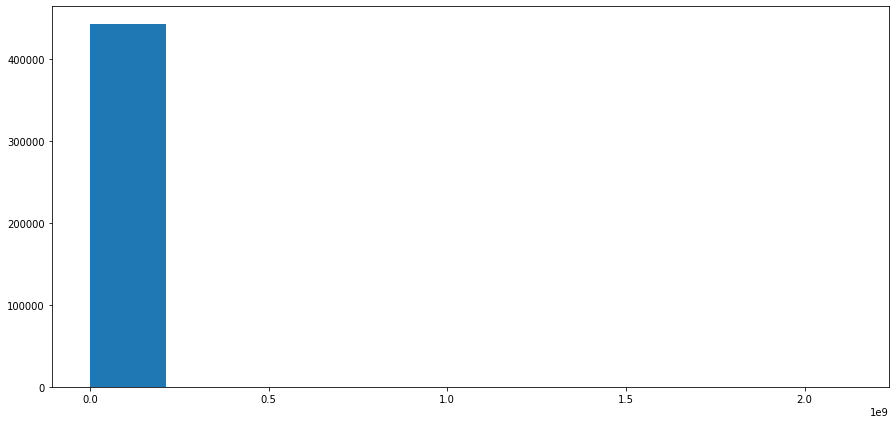

In [36]:
plt.figure(figsize=[15,7])
plt.hist(entries_count.counts);

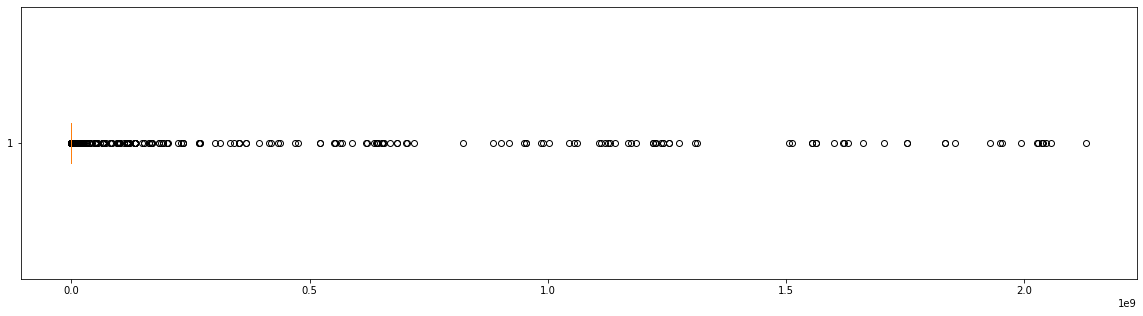

In [37]:
plt.figure(figsize = (20,5))
plt.boxplot(entries_count.counts, vert=False);

In [38]:
entries_count.counts.quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98])

0.75   1204.00
0.80   1444.00
0.85   1761.00
0.90   2199.00
0.95   3058.00
0.97   4036.00
0.98   8304.84
Name: counts, dtype: float64

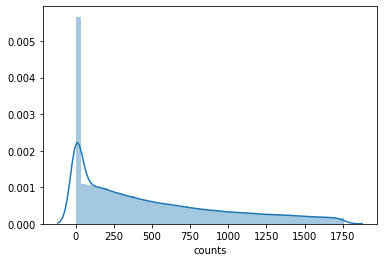

In [20]:
verix = entries_count[entries_count["counts"]<(entries_count.counts.quantile(0.85))]
ax=sns.distplot(verix["counts"])

In [21]:
entries_count["counts"] = np.where((entries_count.counts > entries_count.counts.quantile(0.85)), entries_count.counts.median(), entries_count.counts)

In [41]:
entries_count["counts"].describe()

count   443003.00
mean       496.74
std        443.20
min          0.00
25%        124.00
50%        486.00
75%        704.00
max       1761.00
Name: counts, dtype: float64

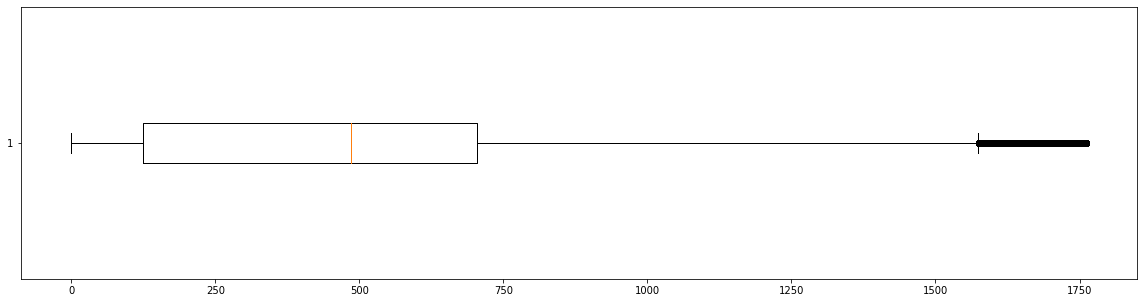

In [43]:
plt.figure(figsize = (20,5))
plt.boxplot(entries_count["counts"], vert=False);

In [44]:
entries_count.sort_values(by=["counts"], ascending=False)

,turnstile,date,dayname,counts
253842,PTH05-R543-00-00-03-EXCHANGE PLACE,2019-12-13,Friday,1761.00
33227,B019-R149-00-00-02-NEWKIRK PLAZA,2019-12-02,Monday,1761.00
111776,N062-R011-01-03-00-42 ST-PORT AUTH,2019-12-06,Friday,1761.00
355730,R250-R179-00-00-06-86 ST,2018-12-19,Wednesday,1761.00
23555,A060-R001-00-00-01-WHITEHALL S-FRY,2019-12-21,Saturday,1761.00
...,...,...,...,...
422961,R610-R057-00-05-01-ATL AV-BARCLAY,2018-12-17,Monday,0.00
422960,R610-R057-00-05-01-ATL AV-BARCLAY,2018-12-16,Sunday,0.00
422959,R610-R057-00-05-01-ATL AV-BARCLAY,2018-12-15,Saturday,0.00
422958,R610-R057-00-05-01-ATL AV-BARCLAY,2018-12-14,Friday,0.00


In [22]:
entries_count[entries_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts"]].sum().sort_values(["counts"])

,counts
dayname,
Sunday,6315.00
Saturday,7493.00
Monday,8167.00
Tuesday,8422.00
Thursday,8430.00
Friday,8907.00
Wednesday,9026.00


In [46]:
veri = entries_count[entries_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts"]].sum().reset_index()

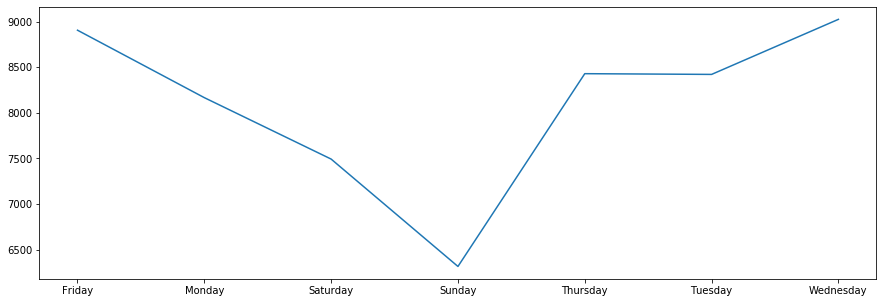

In [47]:
plt.figure(figsize=(15,5))
plt.plot(veri.dayname, veri.counts)

# top stations by entry:

In [435]:
pd.options.display.max_rows=1000

**Daily total counts of people exit for each turnstile**

In [23]:
mta.groupby(["turnstile","date", "dayname"])[["counts_exits"]].sum().sort_values("counts_exits") # shows daily total exits for each turnstile

counts_exits
turnstile                           date       dayname               
TRAM2-R469-00-05-01-RIT-ROOSEVELT   2020-12-25 Friday            0.00
R262B-R195-05-00-02-161/YANKEE STAD 2019-12-17 Tuesday           0.00
                                    2019-12-16 Monday            0.00
                                    2019-12-15 Sunday            0.00
                                    2019-12-14 Saturday          0.00
...                                                               ...
N325A-R218-00-05-01-ELMHURST AV     2020-11-28 Saturday 1973082216.00
N506-R022-00-05-03-34 ST-HERALD SQ  2020-11-28 Saturday 2036528840.00
N506-R022-00-05-04-34 ST-HERALD SQ  2020-11-28 Saturday 2048631773.00
R523-R147-00-00-04-61 ST WOODSIDE   2019-11-30 Saturday 2106875652.00
R107-R305-00-00-02-WTC-CORTLANDT    2019-12-22 Sunday   3690987530.00

[443003 rows x 1 columns]

In [805]:
(mta.counts_exits == 0).sum()
# 0 larla sonra ilgilen

406272

In [24]:
exits_count = mta.groupby(["turnstile","date", "dayname"], as_index=False)[["counts_exits"]].sum().sort_values("counts_exits")
# a new dataset contains daily total exits for each turnstile

In [25]:
exits_count.describe()

,counts_exits
count,443003.00
mean,265278.28
std,18157635.89
min,0.00
25%,95.00
50%,355.00
75%,898.00
max,3690987530.00


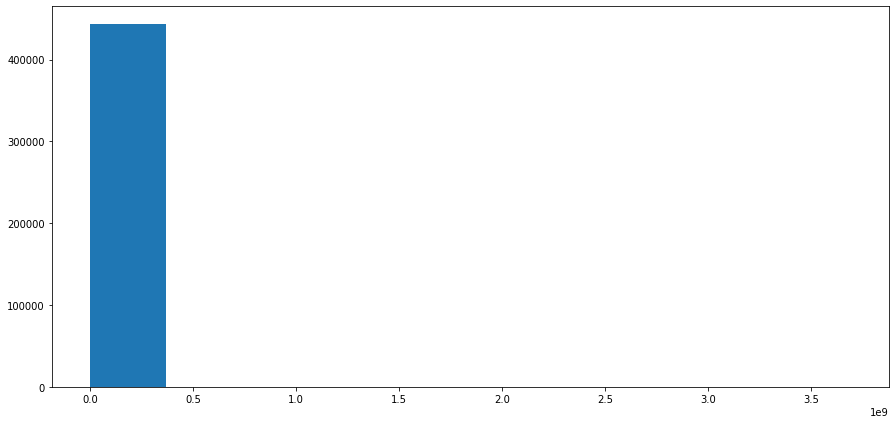

In [51]:
plt.figure(figsize=[15,7])
plt.hist(exits_count.counts_exits);

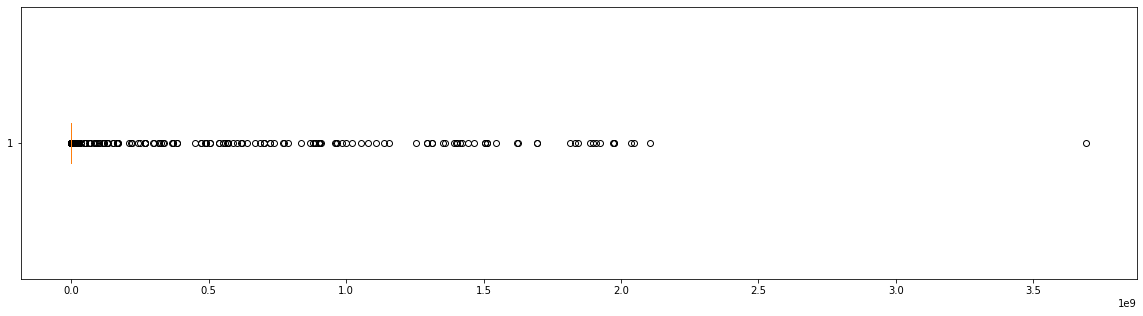

In [52]:
plt.figure(figsize = (20,5))
plt.boxplot(exits_count.counts_exits, vert=False);

In [53]:
exits_count.counts_exits.quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98])

0.75    898.00
0.80   1108.00
0.85   1391.00
0.90   1848.00
0.95   2793.00
0.97   4001.00
0.98   8028.96
Name: counts_exits, dtype: float64

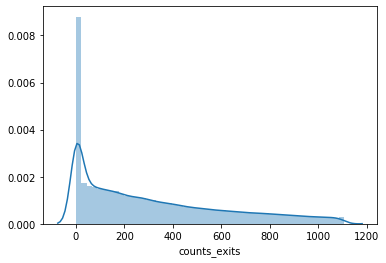

In [26]:
veriy = exits_count[exits_count["counts_exits"]<(exits_count.counts_exits.quantile(0.80))]
ax2=sns.distplot(veriy["counts_exits"])

In [27]:
exits_count["counts_exits"] = np.where((exits_count.counts_exits > exits_count.counts_exits.quantile(0.80)), exits_count.counts_exits.median(), exits_count.counts_exits)

In [56]:
exits_count["counts_exits"].describe()

count   443003.00
mean       326.68
std        271.18
min          0.00
25%         95.00
50%        355.00
75%        429.00
max       1108.00
Name: counts_exits, dtype: float64

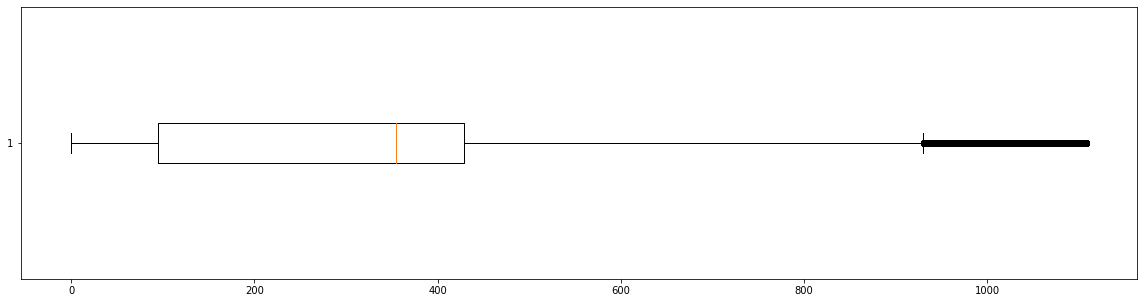

In [57]:
plt.figure(figsize = (20,5))
plt.boxplot(exits_count["counts_exits"], vert=False);

In [58]:
exits_count[exits_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts_exits"]].sum().sort_values(["counts_exits"])

,counts_exits
dayname,
Sunday,4568.00
Monday,4673.00
Tuesday,4737.00
Wednesday,4868.00
Thursday,5325.00
Friday,5384.00
Saturday,6985.00


In [59]:
veri = exits_count[exits_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts_exits"]].sum().reset_index()

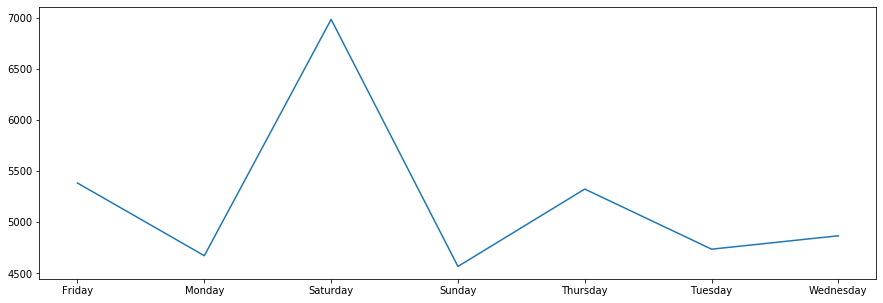

In [60]:
plt.figure(figsize=(15,5))
plt.plot(veri.dayname, veri.counts_exits)

In [61]:
mta.head()

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts,counts_exits
0,A002,R051,02-00-00,59 ST,2018-11-24,03:00:00,6845468,2321627,2018-11-24 03:00:00,Saturday,A002-R051-02-00-00-59 ST,nan,nan
1,A002,R051,02-00-00,59 ST,2018-11-24,07:00:00,6845479,2321635,2018-11-24 07:00:00,Saturday,A002-R051-02-00-00-59 ST,11.00,8.00
2,A002,R051,02-00-00,59 ST,2018-11-24,11:00:00,6845578,2321702,2018-11-24 11:00:00,Saturday,A002-R051-02-00-00-59 ST,99.00,67.00
3,A002,R051,02-00-00,59 ST,2018-11-24,15:00:00,6845780,2321753,2018-11-24 15:00:00,Saturday,A002-R051-02-00-00-59 ST,202.00,51.00
4,A002,R051,02-00-00,59 ST,2018-11-24,19:00:00,6846083,2321818,2018-11-24 19:00:00,Saturday,A002-R051-02-00-00-59 ST,303.00,65.00


In [62]:
mta.isnull().sum()

c/a                0
unit               0
scp                0
station            0
date               0
time               0
entries            0
exits              0
datetime           0
dayname            0
turnstile          0
counts          5076
counts_exits    5076
dtype: int64

In [ ]:
NAN NEDEN OLDU??

In [63]:
mta[mta.counts.isnull()]

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts,counts_exits
0,A002,R051,02-00-00,59 ST,2018-11-24,03:00:00,6845468,2321627,2018-11-24 03:00:00,Saturday,A002-R051-02-00-00-59 ST,nan,nan
42,A002,R051,02-00-01,59 ST,2018-11-24,03:00:00,6116063,1370862,2018-11-24 03:00:00,Saturday,A002-R051-02-00-01-59 ST,nan,nan
84,A002,R051,02-03-00,59 ST,2018-11-24,03:00:00,1158012,4340806,2018-11-24 03:00:00,Saturday,A002-R051-02-03-00-59 ST,nan,nan
126,A002,R051,02-03-01,59 ST,2018-11-24,03:00:00,908675,1412747,2018-11-24 03:00:00,Saturday,A002-R051-02-03-01-59 ST,nan,nan
168,A002,R051,02-03-02,59 ST,2018-11-24,03:00:00,5992950,8120340,2018-11-24 03:00:00,Saturday,A002-R051-02-03-02-59 ST,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199143,TRAM2,R469,00-00-01,RIT-ROOSEVELT,2018-11-24,00:00:00,2826535,32574,2018-11-24 00:00:00,Saturday,TRAM2-R469-00-00-01-RIT-ROOSEVELT,nan,nan
199185,TRAM2,R469,00-03-00,RIT-ROOSEVELT,2018-11-24,00:00:00,626656,23950,2018-11-24 00:00:00,Saturday,TRAM2-R469-00-03-00-RIT-ROOSEVELT,nan,nan
199227,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2018-11-24,00:00:00,3006473,389769,2018-11-24 00:00:00,Saturday,TRAM2-R469-00-03-01-RIT-ROOSEVELT,nan,nan
199269,TRAM2,R469,00-05-00,RIT-ROOSEVELT,2018-11-24,00:00:00,2830,62,2018-11-24 00:00:00,Saturday,TRAM2-R469-00-05-00-RIT-ROOSEVELT,nan,nan


**TRAFFIC**

In [28]:
mta["traffic"] = mta["counts"] + mta["counts_exits"]

In [65]:
mta["traffic"].describe()

count      2667707.00
mean         92707.75
std       13870297.67
min              0.00
25%             19.00
50%            102.00
75%            311.00
max     3940596484.00
Name: traffic, dtype: float64

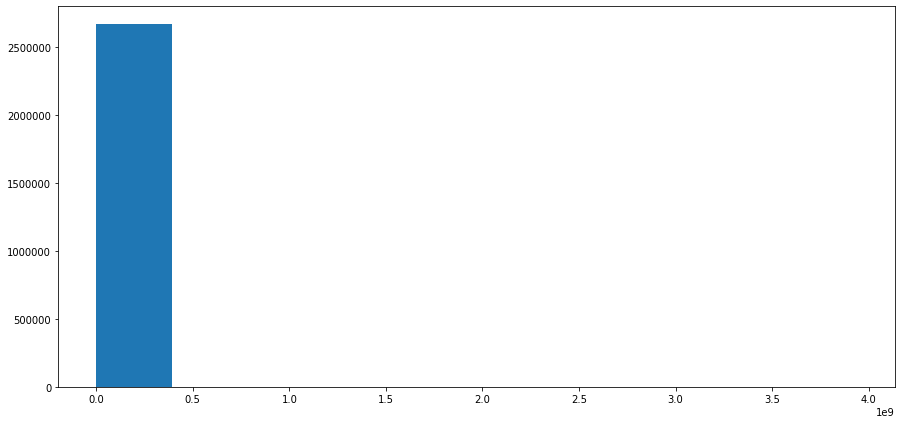

In [66]:
plt.figure(figsize=[15,7])
plt.hist(mta["traffic"]);

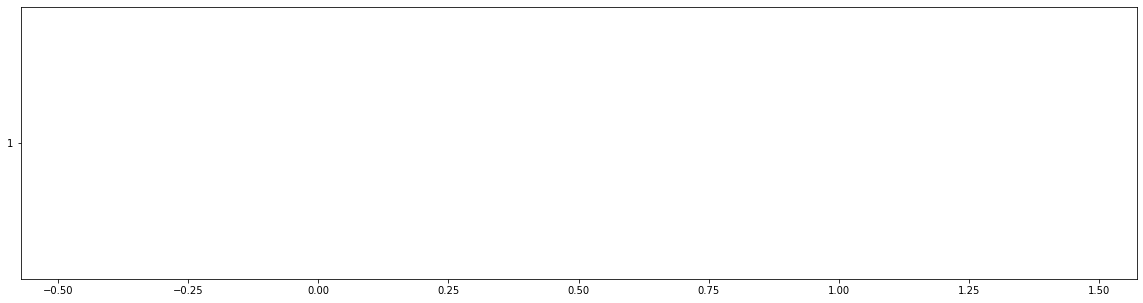

In [67]:
plt.figure(figsize = (20,5))
plt.boxplot(mta.traffic, vert=False);

In [68]:
mta["traffic"].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98])

0.75    311.00
0.80    391.00
0.85    501.00
0.90    663.00
0.95    962.00
0.97   1199.00
0.98   1398.00
Name: traffic, dtype: float64

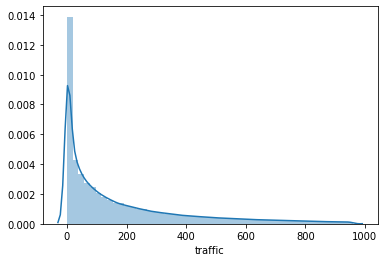

In [29]:
veriz = mta[mta["traffic"]<(mta["traffic"].quantile(0.95))]
ax=sns.distplot(veriz["traffic"])

In [30]:
mta["traffic"] = np.where((mta["traffic"] > mta["traffic"].quantile(0.95)), mta["traffic"].median(), mta["traffic"])

In [71]:
mta["traffic"].describe()

count   2667707.00
mean        174.93
std         212.30
min           0.00
25%          19.00
50%         102.00
75%         249.00
max         962.00
Name: traffic, dtype: float64

In [31]:
traffic = mta.groupby("dayname")[["traffic"]].sum().sort_values(by=["traffic"]).reset_index()

In [73]:
traffic

,dayname,traffic
0,Sunday,47735151.00
1,Saturday,56416984.00
2,Tuesday,71474630.00
3,Wednesday,71813497.00
4,Monday,72044742.00
5,Thursday,73445956.00
6,Friday,73735306.00


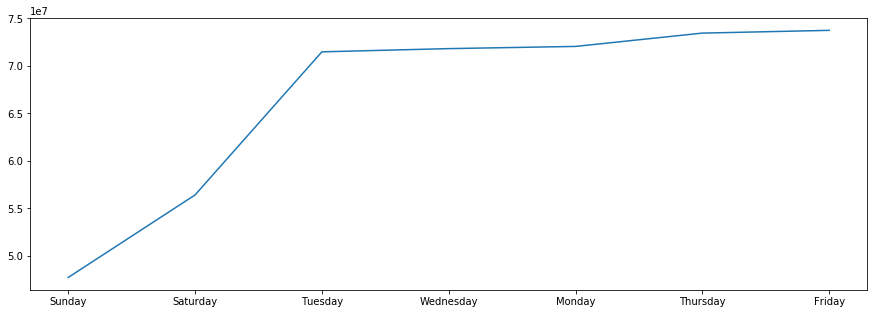

In [74]:
plt.figure(figsize=(15,5))
plt.plot(traffic.dayname, traffic.traffic)

In [32]:
trafficbyturnstile = mta.groupby(["turnstile"])[["traffic"]].sum().sort_values(by=["traffic"],ascending=False).reset_index().head(15)

In [76]:
trafficbyturnstile

,turnstile,traffic
0,H037-R349-00-00-00-SUTTER AV,244291.00
1,R414-R162-00-00-00-ELDER AV,244176.00
2,R529-R208-00-00-00-103 ST-CORONA,241967.00
3,R529-R208-00-00-04-103 ST-CORONA,239058.00
4,N124-R103-00-03-02-BROADWAY JCT,238832.00
5,R528-R097-00-00-00-JUNCTION BLVD,235942.00
6,R530-R310-00-00-04-111 ST,233423.00
7,R186-R036-00-00-00-DYCKMAN ST,230193.00
8,R284-R243-00-00-03-170 ST,228846.00
9,R529-R208-00-05-00-103 ST-CORONA,228779.00


In [33]:
indices = range(len(trafficbyturnstile))

In [34]:
trafficbyturnstile = trafficbyturnstile.set_index('turnstile')

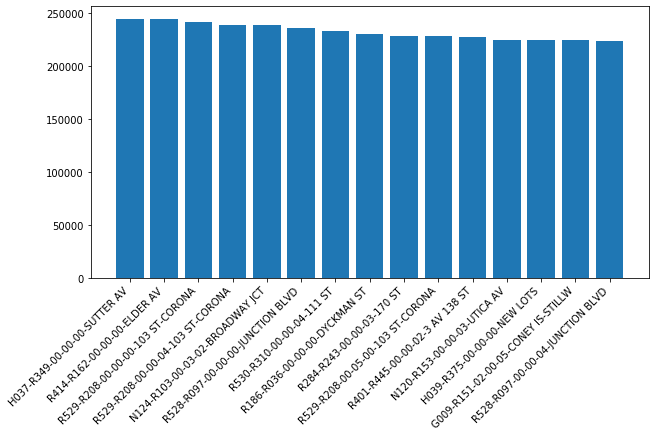

In [79]:
plt.figure(figsize=[10,5])
plt.bar(trafficbyturnstile.index, trafficbyturnstile.traffic)
plt.xticks(rotation=45, ha='right');